# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib  
import shap  


# load datasets

In [2]:
data = pd.read_csv( r'C:\Users\admin\Downloads\Churn_Modelling.csv')

# EDA (Exploratory Data Analysis)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.shape

(10000, 14)

# Churn Distribution

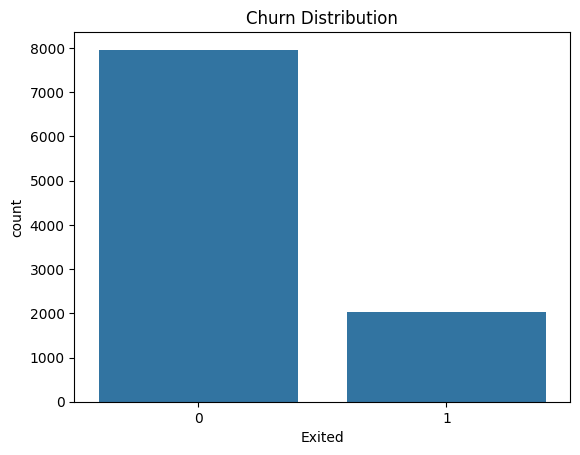

In [7]:
sns.countplot(x='Exited', data=data)
plt.title("Churn Distribution")
plt.show()

# Drop irrelevant columns

In [8]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encode categorical variables

In [9]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Separate features and target variable

In [10]:
X = data.drop(columns=['Exited'])
y = data['Exited']

# Standardize numerical features

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Logistic Regression

In [13]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
print("Logistic Regression Model Trained Successfully!")

Logistic Regression Model Trained Successfully!


In [14]:
y_pred_logistic = logistic_model.predict(X_test)
print("Predictions from Logistic Regression Completed!")

Predictions from Logistic Regression Completed!


In [15]:
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_logistic))
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {logistic_accuracy}")

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

Accuracy: 0.8155


# Random Forest

In [16]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
print("Random Forest Model Trained Successfully!")

Random Forest Model Trained Successfully!


In [17]:
y_pred_rf = random_forest_model.predict(X_test)
print("Predictions from Random Forest Completed!")

Predictions from Random Forest Completed!


In [18]:
print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {rf_accuracy}")

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.864


# Gradient Boosting

In [19]:
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
print("Gradient Boosting Model Trained Successfully!")

Gradient Boosting Model Trained Successfully!


In [20]:
y_pred_gb = gradient_boosting_model.predict(X_test)
print("Predictions from Gradient Boosting Completed!")

Predictions from Gradient Boosting Completed!


In [21]:
print("Gradient Boosting Evaluation:")
print(classification_report(y_test, y_pred_gb))
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {gb_accuracy}")

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.866


# Determine the best model

In [22]:
best_model = None
if gb_accuracy >= max(logistic_accuracy, rf_accuracy):
    best_model = gradient_boosting_model
    print("\nBest Model: Gradient Boosting")
elif rf_accuracy > logistic_accuracy:
    best_model = random_forest_model
    print("\nBest Model: Random Forest")
else:
    best_model = logistic_model
    print("\nBest Model: Logistic Regression")


Best Model: Gradient Boosting


# Save the best model to a file

In [23]:
joblib.dump(best_model, 'best_churn_model.pkl')
print("Best model saved as 'best_churn_model.pkl'!")


Best model saved as 'best_churn_model.pkl'!


# XAI

In [24]:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Visualize feature importance

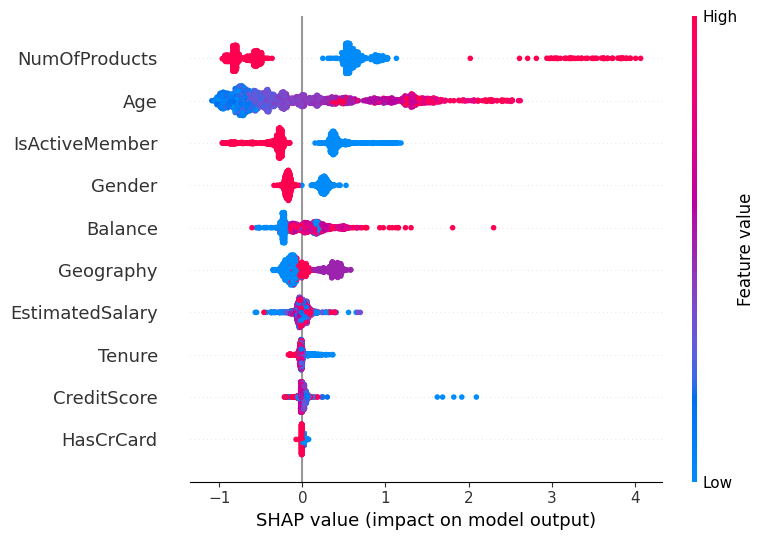

In [25]:
shap.summary_plot(shap_values, X_test, feature_names=data.drop(columns=['Exited']).columns)